In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

In [15]:
args = {}
args["ci"] =  "../data/raw/first/capture_246058.txt"
args["co"] =  "../data/raw/first/capture_clean.csv"
args["starttime"] = '2019-10-11 10:17:00.000'
args["signalstart"] = "2019-10-11 11:00:00+00:00"
args["signalend"] = "2019-10-11 17:00:00+00:00"

In [19]:
def cleanCapture(infile, outfile, starttime):
    df = pd.read_csv(infile)
    cols = ['ax', 'ay', 'az', 'gx', 'gy', 'gz']
    a_sensitivity = 16384.
    g_sensitivity = 131.
    for col in ['ax', 'ay', 'az']:
        df[col] = df[col]/a_sensitivity #g force                                                                                                                                                            
    for col in ['gx', 'gy', 'gz']:
        df[col] = df[col]/g_sensitivity #degree per second                                                                                                                                                  

    df = df.sort_values(by='time').reset_index(drop=True) #ms                                                                                                                                               
    start = df['time'].values[0]
    df['dt'] = df['time'] - start
    df['dt'] = pd.to_timedelta(df['dt'], unit='ms')
    df['timestamp'] = pd.to_datetime(starttime) + df['dt']
    df['timestamp'] = df['timestamp'].dt.tz_localize("Europe/Oslo")
    df['timestamp'] = df['timestamp'].dt.tz_convert("UTC")
    df.to_csv(outfile, index=False)
    return df, df.timestamp.min(), df.timestamp.max()

def smoothColumns(df, cols, ws):
    savgol_cols = ['{}_savgol'.format(col) for col in cols]
    for i, col in enumerate(cols):
        df[savgol_cols[i]] = savgol_filter(df[col], ws ,3)
    return df

In [20]:
capture, capture_start, capture_end = cleanCapture(args['ci'], args['co'], args['starttime'])

In [21]:
capture.head()

,time,diff_ms,ax,ay,az,gx,gy,gz,temp,batt,dt,timestamp
0,5449,51,0.019775,1.116211,-0.062500,-4.442748,1.106870,4.305344,-7936,1024,00:00:00,2019-10-11 08:17:00+00:00
1,5484,35,-0.003906,1.095459,-0.045410,-7.946565,2.549618,8.763359,-7920,1024,00:00:00.035000,2019-10-11 08:17:00.035000+00:00
2,5536,52,0.046875,1.125244,-0.045166,-3.282443,-0.061069,6.610687,-7936,1024,00:00:00.087000,2019-10-11 08:17:00.087000+00:00
3,5571,35,0.025391,1.119873,-0.062500,-4.694656,0.763359,7.664122,-7920,1024,00:00:00.122000,2019-10-11 08:17:00.122000+00:00
4,5625,54,0.034424,1.109375,-0.040771,-7.732824,2.312977,5.068702,-7920,1024,00:00:00.176000,2019-10-11 08:17:00.176000+00:00


In [35]:
wss = [51, 101, 201, 301, 401, 501]

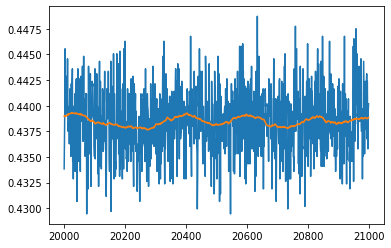

In [36]:

for ws in wss:
    df = smoothColumns(capture, ['ax', 'gx'], ws)
df = df[20000:21000]
plt.figure()
plt.plot(df.ax)
plt.plot(df.ax_savgol)
plt.title('window size = {}'.format(ws))
plt.show()